In [38]:
#Importando librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [39]:
df = pd.read_csv('train.csv')

In [40]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
#Voy a dejar el Id como índice
df.set_index("Id", inplace = True)

In [42]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
#Revisando dataframe y nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [152]:
df_replace = df.replace({'Alley': {'NA': 0, 'Pave': 1, 'Grvl': 2},
               'LandSlope': {'Gtl':0, 'Mod':1, 'Sev':2},
               'LandContour':{'Lvl':0, 'Bnk': 1, 'HLS': 2, 'Low':3},
               'LotShape':{'Reg':0, 'IR1': 1, 'IR2':2, 'IR3':3},
               'ExterQual':{'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
               'ExterCond':{'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
               'BsmtQual':{'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
               'BsmtCond':{'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
               'BsmtExposure':{'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4},
               'BsmtFinType1':{'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
               'BsmtFinType2':{'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
               'HeatingQC':{'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
               'FireplaceQu':{'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
               'GarageType':{'NA':0, 'Detchd':1, 'CarPort':2, 'BuiltIn':3, 'Bsment':4, 'Attchd':5, '2Types':6},
               'GarageFinish':{'NA':0, 'Unf':1, 'RFn':2, 'Fin':3},
               'GarageQual':{'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
               'GarageCond':{'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
               'PoolQC':{'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
               'Fence':{'NA':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}})

In [157]:
df_replace.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     float64
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [158]:
#Voy a eliminar las columnas que tienen muchos más de 600 datos con null
nulls = df_replace.isnull().sum()

#Definiendo columnas a remover
cols_to_remove = list((nulls[nulls > 600]).index)
cols_to_remove

#Nuevo dataframe con las columnas a remover
data_no_null = df_replace.drop(cols_to_remove, axis = 1)

#Reviso cuáles siguen siendo las columnas con valores null
data_no_null.isnull().sum()


MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

In [159]:
#Como todavía tengo valores null pero son menos de la mitad de mi dataset, voy a quitar esas filas
df_clean = data_no_null.dropna()
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   MSZoning       1094 non-null   object 
 2   LotFrontage    1094 non-null   float64
 3   LotArea        1094 non-null   int64  
 4   Street         1094 non-null   object 
 5   LotShape       1094 non-null   int64  
 6   LandContour    1094 non-null   int64  
 7   Utilities      1094 non-null   object 
 8   LotConfig      1094 non-null   object 
 9   LandSlope      1094 non-null   int64  
 10  Neighborhood   1094 non-null   object 
 11  Condition1     1094 non-null   object 
 12  Condition2     1094 non-null   object 
 13  BldgType       1094 non-null   object 
 14  HouseStyle     1094 non-null   object 
 15  OverallQual    1094 non-null   int64  
 16  OverallCond    1094 non-null   int64  
 17  YearBuilt      1094 non-null   int64  
 18  YearRemo

In [160]:
#Al final me quedé con un dataset de 1094 filas y 76 columnas
#Lo voy a exportar para hacer la estadística descriptiva en Tableau
df_clean.to_csv('dataclean.csv')
data_clean = pd.read_csv('dataclean.csv')

data_clean.shape

(1094, 76)

In [161]:
#Voy a separar la data por numérico y no numérico y luego los voy a concatenar
numerical = pd.DataFrame(data_clean.select_dtypes([np.number]))  
#numerical.set_index("Id", inplace = True)
numerical.head()


,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,0,0,0,7,5,2003,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,0,0,0,6,8,1976,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,1,0,0,7,5,2001,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,1,0,0,7,5,1915,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,1,0,0,8,5,2000,...,192,84,0,0,0,0,0,12,2008,250000


In [162]:
#Voy a hacer dummies de las columnas categóricas
categories = data_clean[['LandSlope', 'LandContour', 'LotShape', 'ExterQual', 'ExterCond', 'BsmtQual',
              'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
              'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Street', 'CentralAir', 'MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1',
              'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
              'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']]



In [163]:
#Voy a revisar cuántas categorías hay en cada columna
for col in categories.columns:
    print(col, ': ', len(categories[col].unique()), 'labels' )

LandSlope :  3 labels
LandContour :  4 labels
LotShape :  4 labels
ExterQual :  4 labels
ExterCond :  4 labels
BsmtQual :  4 labels
BsmtCond :  4 labels
BsmtExposure :  4 labels
BsmtFinType1 :  6 labels
BsmtFinType2 :  6 labels
HeatingQC :  5 labels
KitchenQual :  4 labels
GarageType :  6 labels
GarageFinish :  3 labels
GarageQual :  5 labels
GarageCond :  5 labels
Street :  2 labels
CentralAir :  2 labels
MSSubClass :  15 labels
MSZoning :  5 labels
LotConfig :  5 labels
Neighborhood :  25 labels
Condition1 :  9 labels
Condition2 :  6 labels
BldgType :  5 labels
HouseStyle :  8 labels
RoofStyle :  5 labels
RoofMatl :  7 labels
Exterior1st :  14 labels
Exterior2nd :  16 labels
MasVnrType :  4 labels
Foundation :  5 labels
Heating :  4 labels
Electrical :  5 labels
Functional :  6 labels
PavedDrive :  3 labels
SaleType :  9 labels
SaleCondition :  6 labels


In [164]:
#Las columnas que tengo
print(categories.shape)

#Cuántas columnas obtendré al hacer el one hot enconding
print(pd.get_dummies(categories, drop_first = True).shape)

(1094, 38)
(1094, 153)


In [165]:
#Haciendo dummies con las categóricas que no son nominales

categorical = categories[['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
                          'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                          'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'PavedDrive',
                          'SaleType', 'SaleCondition']]

categorical_dummies = pd.get_dummies(categorical)
categorical_dummies.head()

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,20,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,60,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,70,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,60,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [166]:
#Ahora voy a concatenar mis dataframe para poder hacer la regresión ya con valores numéricos

merged = pd.concat([numerical, categorical_dummies], axis = 'columns')
merged.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,0,0,0,7,5,2003,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,0,0,0,6,8,1976,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,1,0,0,7,5,2001,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,1,0,0,7,5,1915,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,1,0,0,8,5,2000,...,0,0,0,1,0,0,0,0,1,0


In [167]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Columns: 200 entries, Id to SaleCondition_Partial
dtypes: float64(11), int64(42), uint8(147)
memory usage: 610.2 KB


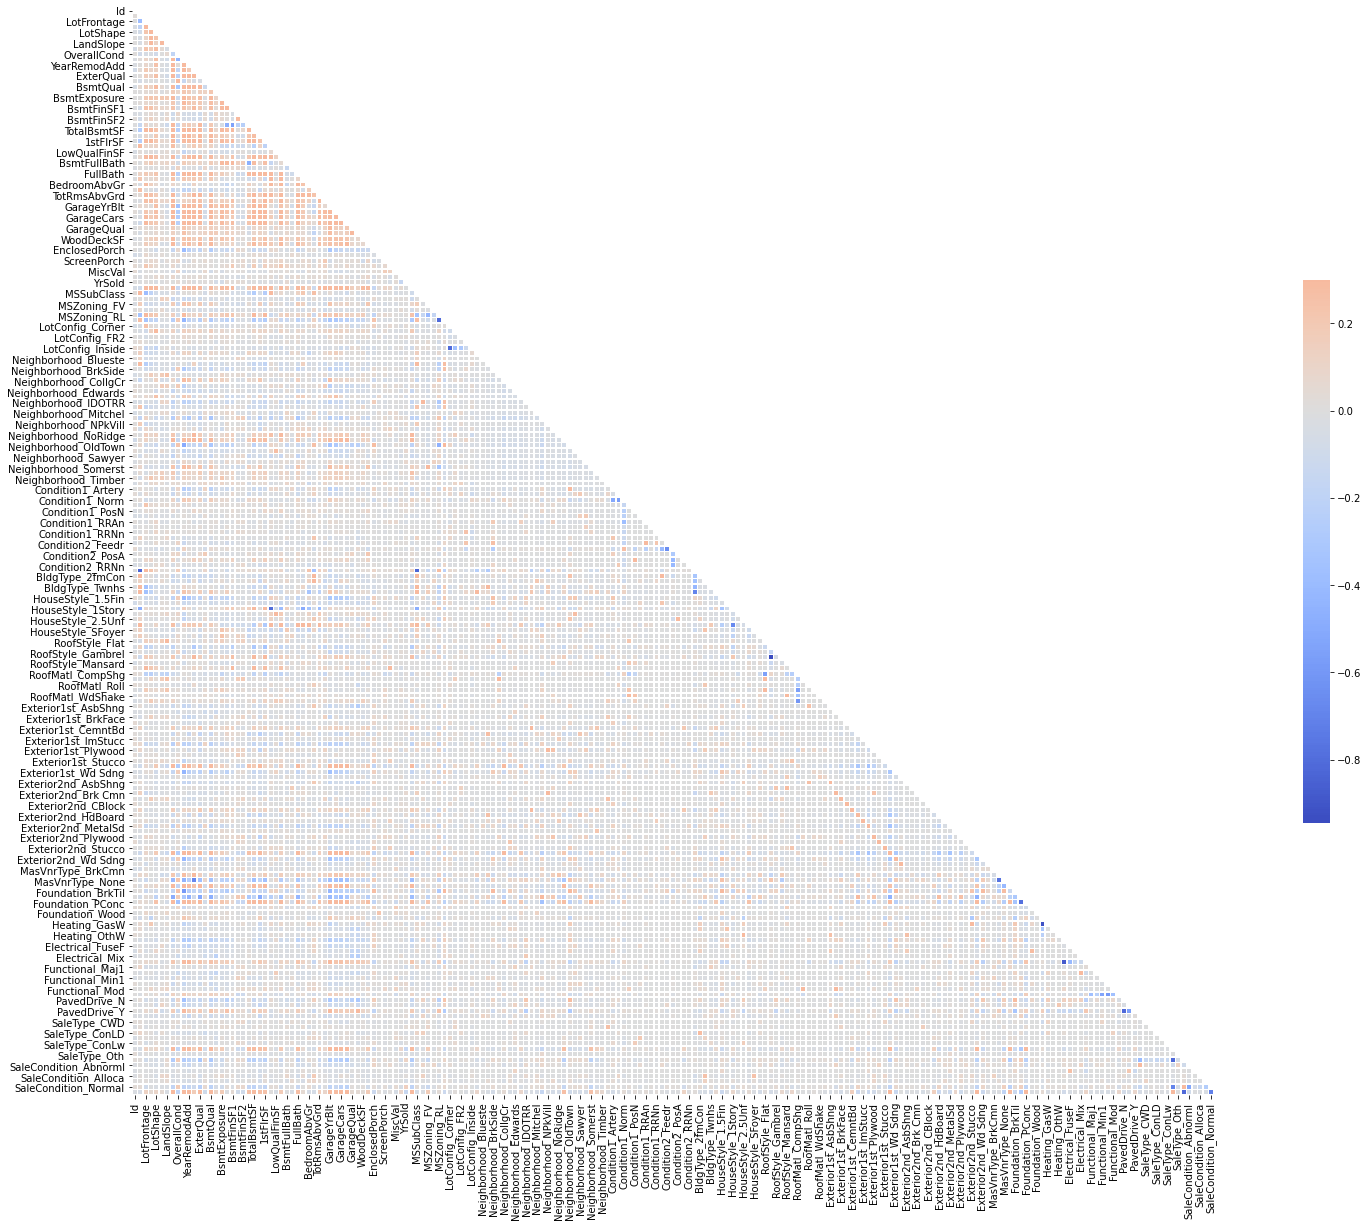

In [170]:
#Ya que hice esto, voy a hacer otra regresión
corr_2 = merged.corr()

corr_2


#Graficando correlación

# Generando mask para el triángulo superior
mask = np.triu(np.ones_like(corr_2, dtype = bool))

# Diseñando la figura de matplotlib
f, ax = plt.subplots(figsize=(30, 20))

# Generando colores
#cmap = sns.diverging_palette(230, 20, as_cmap = True)
#cmap = 'YlGnBu'
#cmap = 'Blues'
#cmap = 'PiYG'
cmap = 'coolwarm'
# Dibujando un heatmap con msk y cierta proporción
sns.heatmap(corr_2, mask = mask, cmap = cmap , vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5});

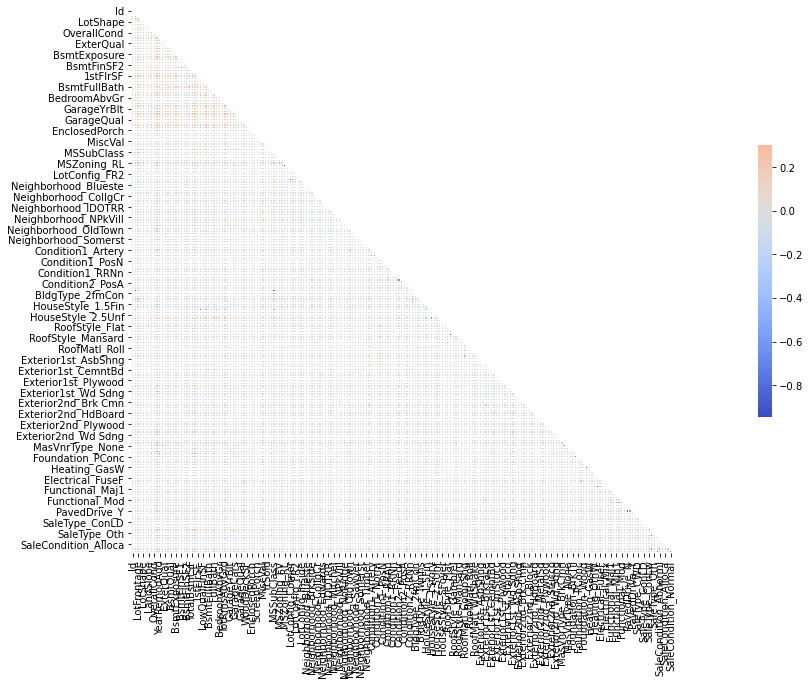

In [171]:
#Covarianza
cov_2 = merged.cov()

cov_2


#Graficando correlación

# Generando mask para el triángulo superior
mask = np.triu(np.ones_like(cov_2, dtype = bool))

# Diseñando la figura de matplotlib
f, ax = plt.subplots(figsize=(30, 10))

# Generando colores
#cmap = sns.diverging_palette(230, 20, as_cmap = True)
#cmap = 'YlGnBu'
#cmap = 'Blues'
#cmap = 'PiYG'
cmap = 'coolwarm'
# Dibujando un heatmap con msk y cierta proporción
sns.heatmap(corr_2, mask = mask, cmap = cmap , vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5});


In [172]:
# PLANTEAMIENTO DEL PROBLEMA
# Hacer un análisi para saber cuáles son los parámetros más importantes que afectan el precio de venta de las casa

#Para hacer primero voy a revisar es la correlación y covarianza para ver cómo se relaciona las variables con el precio


In [173]:
#Obtengo estadísticas de manera general
merged.describe()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,727.375686,56.128885,70.759598,10132.346435,0.341865,0.159963,0.049360,6.247715,5.575868,1972.412249,...,0.003656,0.106033,0.000914,0.848263,0.063985,0.000914,0.005484,0.016453,0.804388,0.108775
std,420.955488,41.976345,24.508859,8212.249621,0.557854,0.540244,0.236888,1.366797,1.066500,31.189752,...,0.060384,0.308021,0.030234,0.358930,0.244839,0.030234,0.073888,0.127269,0.396853,0.311499
min,1.000000,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1880.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,366.500000,20.000000,60.000000,7606.750000,0.000000,0.000000,0.000000,5.000000,5.000000,1953.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,723.500000,50.000000,70.000000,9444.500000,0.000000,0.000000,0.000000,6.000000,5.000000,1975.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1093.750000,70.000000,80.000000,11387.250000,1.000000,0.000000,0.000000,7.000000,6.000000,2003.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,3.000000,3.000000,2.000000,10.000000,9.000000,2010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [175]:
#Para hacer la regresión voy a utilizar las variables que determiné que explican mejor el modelo
#El valor y es sales price 
#Variable dependiente
y = merged['SalePrice']
#Variables independientes
x = merged[['LotFrontage', 'LotArea', 'LotShape', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual',
              'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
              'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]




from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(x, y)


LinearRegression()

In [176]:
#Obtengo los coeficientes para cada variable en mi modelo
reg.coef_

array([-2.92830718e+01,  6.85618151e-01,  6.89580646e+02,  1.48773359e+04,
       -7.02398805e+01,  2.60619086e+02,  2.98951272e+01,  1.83430114e+04,
        1.34486742e+04,  5.31288558e+03,  3.42678106e+03,  8.40564346e+00,
        1.60581991e+01,  1.03813679e+01,  2.26406913e+01, -2.39639739e+03,
        2.75337256e+03,  2.41962949e+03,  7.38350950e+03, -1.64184305e+02,
        3.12971440e+03,  1.07653648e+04,  2.25667010e+01,  1.76970057e+01,
       -1.40642505e+01])

In [177]:
#Obtengo el intercept
reg.intercept_

-205342.9128483959

In [178]:
#Obtengo el valor de la regresión
reg.score(x, y)

0.8047624163805237

In [179]:
#Ahora intentaré hacer otra regresión con mínimos cuadrados

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

#De acuerdo con la tabla veo que la R2 es de 0.805 lo que dice que mi modelo es bueno 
#pero podría ser mejor si agrego otras variables


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     176.1
Date:                Sat, 30 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:20:34   Log-Likelihood:                -13052.
No. Observations:                1094   AIC:                         2.616e+04
Df Residuals:                    1068   BIC:                         2.629e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.053e+05   1.95e+05     -1.053   